First 5 rows of Titanic dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       -----

C:\Users\Prithvi\AppData\Local\Temp\ipykernel_21624\2413687222.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
C:\Users\Prithvi\AppData\Local\Temp\ipykernel_21624\2413687222.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


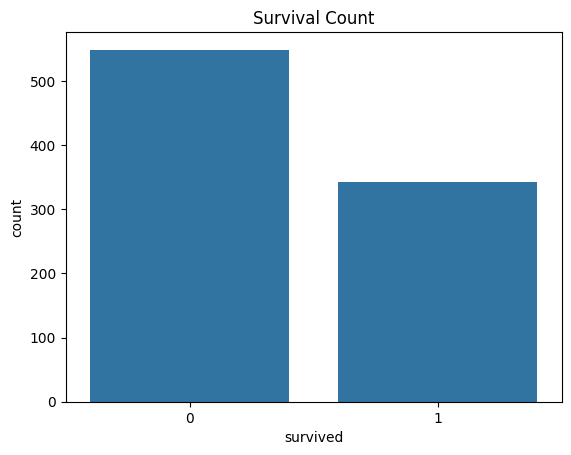

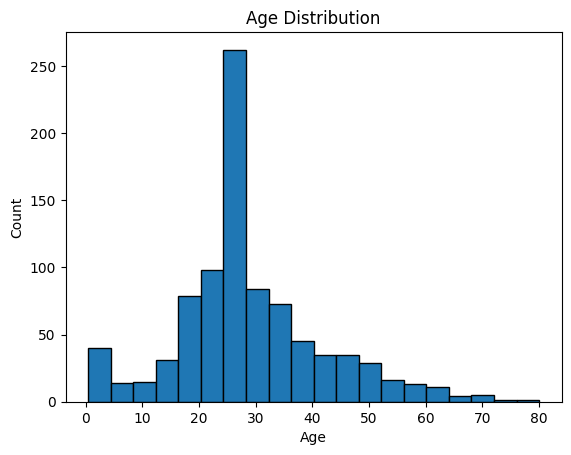

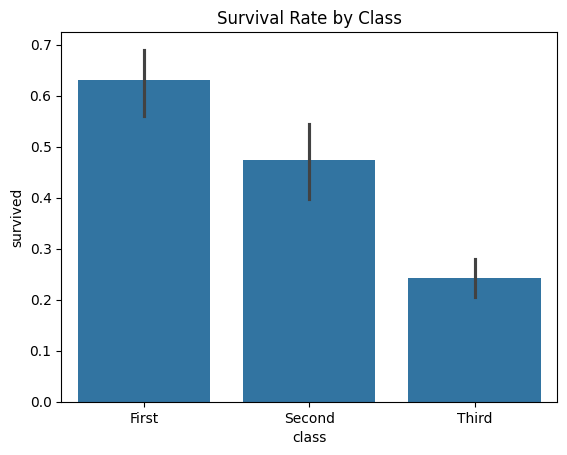

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")
print("First 5 rows of Titanic dataset:")
print(df.head())

# --- Basic Info ---
print("\nDataset Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

# --- Handling Missing Values ---
# Fill age with median, embark_town with mode
df["age"].fillna(df["age"].median(), inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)
df.drop(columns=["deck"], inplace=True)  # Too many missing values

# --- Encoding categorical ---
df = pd.get_dummies(df, columns=["sex", "class", "embark_town"], drop_first=True)

print("\nAfter Preprocessing:")
print(df.head())

# --- EDA (Exploratory Data Analysis) ---
# 1. Survival Rate
sns.countplot(x="survived", data=sns.load_dataset("titanic"))
plt.title("Survival Count")
plt.show()

# 2. Age distribution
plt.hist(df["age"], bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 3. Survival by class
sns.barplot(x="class", y="survived", data=sns.load_dataset("titanic"))
plt.title("Survival Rate by Class")
plt.show()
